In [67]:
# import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# importing dataset
df1 = pd.read_excel("../dataset/site1.xlsx")
# df2 = pd.read_excel("../dataset/site2.xlsx")
# df3 = pd.read_excel("../dataset/site3.xlsx")

In [70]:
# check the length of each dataset
len(df1)
# len(df2)
# len(df3)

70176

In [71]:
# Check Columns
df1.columns

Index(['Time(year-month-day h:m:s)', 'Wind speed at height of 10 meters (m/s)',
       'Wind direction at height of 10 meters (˚)',
       'Wind speed at height of 30 meters (m/s)',
       'Wind direction at height of 30 meters (˚)',
       'Wind speed at height of 50 meters (m/s)',
       'Wind direction at height of 50 meters (˚)',
       'Wind speed - at the height of wheel hub (m/s)',
       'Wind speed - at the height of wheel hub (˚)', 'Air temperature  (°C) ',
       'Atmosphere (hpa)', 'Relative humidity (%)', 'Power (MW)'],
      dtype='object')

In [72]:
# Rename Columns
df1 = df1.rename(columns={
    'Time(year-month-day h:m:s)': 'Timestamp',
    'Wind speed at height of 10 meters (m/s)': 'WS_10',
    'Wind direction at height of 10 meters (˚)': 'WD_10',
    'Wind speed at height of 30 meters (m/s)': 'WS_30',
    'Wind direction at height of 30 meters (˚)': 'WD_30',
    'Wind speed at height of 50 meters (m/s)': 'WS_50',
    'Wind direction at height of 50 meters (˚)': 'WD_50',
    'Wind speed - at the height of wheel hub (m/s)': 'WS_hub',
    'Wind speed - at the height of wheel hub (˚)': 'WD_hub',
    'Air temperature  (°C) ': 'Air_T',
    'Atmosphere (hpa)': 'Air_P',
    'Relative humidity (%)': 'Air_H',
    'Power (MW)': 'Power'
})

In [73]:
# Check datatypes
df1.dtypes

Timestamp     object
WS_10        float64
WD_10        float64
WS_30        float64
WD_30        float64
WS_50        float64
WD_50        float64
WS_hub       float64
WD_hub       float64
Air_T        float64
Air_P        float64
Air_H        float64
Power        float64
dtype: object

In [74]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

In [75]:
df1.set_index('Timestamp', inplace=True)

In [76]:
#print top values
df1.head()
# Frequency - 15 Seconds

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Air_H,Power
Timestamp,,,,,,,,,,,,
2019-01-01 00:00:00,2.209,81.317,1.991,74.814,2.094,77.667,2.494,74.500,-13.484,889.867,76.320,0.254383
2019-01-01 00:15:00,1.828,77.460,1.698,75.048,1.757,88.733,1.882,74.367,-13.691,889.575,76.757,0.329703
2019-01-01 00:30:00,2.193,86.700,2.313,84.688,2.344,89.100,2.350,89.000,-13.766,889.942,76.981,0.296306
2019-01-01 00:45:00,2.654,78.160,2.494,74.939,2.574,87.267,2.808,82.733,-13.691,889.675,76.821,0.187590
2019-01-01 01:00:00,2.249,94.297,2.192,91.140,2.558,96.900,2.924,92.967,-13.447,890.025,74.571,0.081005


In [77]:
# bottom values
df1.tail()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Air_H,Power
Timestamp,,,,,,,,,,,,
2020-12-31 22:45:00,5.738,234.600,6.408,235.454,6.575,242.033,6.680,238.433,-9.108,890.008,53.312,13.633642
2020-12-31 23:00:00,5.748,229.333,6.231,233.423,6.372,239.800,6.448,236.833,-9.978,889.817,53.877,6.869759
2020-12-31 23:15:00,4.468,235.133,4.406,253.261,4.381,263.400,4.399,261.733,-9.808,889.825,54.437,4.352931
2020-12-31 23:30:00,3.730,242.580,3.280,252.492,3.204,268.600,3.446,266.733,-9.633,889.492,54.677,7.185250
2020-12-31 23:45:00,3.291,243.733,3.311,254.267,3.643,266.733,4.306,268.633,-8.991,889.492,53.381,12.384466


In [78]:
# Check Min and Max
print("Timestamp")
print(df1.index.min());
print(df1.index.max());

print("")
print("Wind Speed - 10")
print(df1['WS_10'].min());
print(df1['WS_10'].max());

print("")
print("Wind Direction - 10")
print(df1['WD_10'].min());
print(df1['WD_10'].max());

print("")
print("Wind Speed - 30")
print(df1['WS_30'].min());
print(df1['WS_30'].max());

print("")
print("Wind Direction - 30")
print(df1['WD_30'].min());
print(df1['WD_30'].max());

print("")
print("Wind Speed - 50")
print(df1['WS_50'].min());
print(df1['WS_50'].max());

print("")
print("Wind Direction - 50")
print(df1['WD_50'].min());
print(df1['WD_50'].max());

print("")
print("Wind Speed - hub")
print(df1['WS_hub'].min());
print(df1['WS_hub'].max());

print("")
print("Wind Direction - hub")
print(df1['WD_hub'].min());
print(df1['WD_hub'].max());

print("")
print("Air - Temperature")
print(df1['Air_T'].min());
print(df1['Air_T'].max());

print("")
print("Air - Pressure")
print(df1['Air_P'].min());
print(df1['Air_P'].max());

print("")
print("Relative Humidity")
print(df1['Air_H'].min());
print(df1['Air_H'].max());

print("")
print("Power")
print(df1['Power'].min());
print(df1['Power'].max());

Timestamp
2019-01-01 00:00:00
2020-12-31 23:45:00

Wind Speed - 10
0.0
25.465

Wind Direction - 10
0.0
358.987

Wind Speed - 30
0.0
29.187

Wind Direction - 30
0.0
359.087

Wind Speed - 50
0.0
29.678

Wind Direction - 50
0.0
358.933

Wind Speed - hub
0.0
30.247

Wind Direction - hub
0.0
358.5

Air - Temperature
-24.131
36.13

Air - Pressure
858.4
918.192

Relative Humidity
1.502
93.12

Power
0.0
98.09444


In [79]:
# convert datetime object
# df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1.dtypes

WS_10     float64
WD_10     float64
WS_30     float64
WD_30     float64
WS_50     float64
WD_50     float64
WS_hub    float64
WD_hub    float64
Air_T     float64
Air_P     float64
Air_H     float64
Power     float64
dtype: object

In [80]:
# check for null values
df1.isnull().mean()

WS_10     0.0
WD_10     0.0
WS_30     0.0
WD_30     0.0
WS_50     0.0
WD_50     0.0
WS_hub    0.0
WD_hub    0.0
Air_T     0.0
Air_P     0.0
Air_H     0.0
Power     0.0
dtype: float64

In [81]:
# Describe the data
df1.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Air_H,Power
count,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000
mean,5.711011,222.829748,6.039255,220.633957,6.168763,221.868203,6.375876,216.986224,8.543324,889.527469,37.581143,23.426896
std,3.119512,73.705902,3.700131,79.846922,3.874708,83.092270,3.907965,85.404564,13.368410,2.439019,18.896256,24.130181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-24.131000,858.400000,1.502000,0.000000
25%,3.538000,209.431500,3.302000,192.871000,3.194000,169.800000,3.300000,144.067000,-3.271000,889.550000,22.355000,1.572839
50%,5.389000,235.987000,5.783000,245.442000,5.811000,251.833000,5.879500,248.825000,9.823000,889.742000,34.401500,14.957783
75%,7.217250,275.287000,8.091000,277.580250,8.384000,281.433000,8.604000,279.304250,19.756000,889.925000,51.584000,40.215230
max,25.465000,358.987000,29.187000,359.087000,29.678000,358.933000,30.247000,358.500000,36.130000,918.192000,93.120000,98.094440


(array([1.8193e+04, 3.5550e+03, 2.7740e+03, 2.3830e+03, 2.2670e+03,
        2.0530e+03, 1.9540e+03, 1.7580e+03, 1.6700e+03, 1.6030e+03,
        1.4830e+03, 1.3850e+03, 1.3030e+03, 1.3350e+03, 1.2440e+03,
        1.2110e+03, 1.1750e+03, 1.2360e+03, 1.1170e+03, 1.1290e+03,
        1.0320e+03, 1.0330e+03, 1.0190e+03, 1.0360e+03, 1.0050e+03,
        1.0110e+03, 9.7000e+02, 9.3000e+02, 8.9600e+02, 8.8100e+02,
        7.6800e+02, 6.8400e+02, 7.3100e+02, 6.4600e+02, 6.4800e+02,
        6.2700e+02, 6.1100e+02, 6.7800e+02, 6.8600e+02, 5.5100e+02,
        4.9400e+02, 4.6300e+02, 7.0700e+02, 4.0200e+02, 2.1600e+02,
        1.9800e+02, 1.3100e+02, 9.3000e+01, 8.2000e+01, 6.7000e+01,
        1.6000e+01, 1.3000e+01, 2.3000e+01]),
 array([ 0.        ,  1.85083849,  3.70167698,  5.55251547,  7.40335396,
         9.25419245, 11.10503094, 12.95586943, 14.80670792, 16.65754642,
        18.50838491, 20.3592234 , 22.21006189, 24.06090038, 25.91173887,
        27.76257736, 29.61341585, 31.46425434, 33.31509

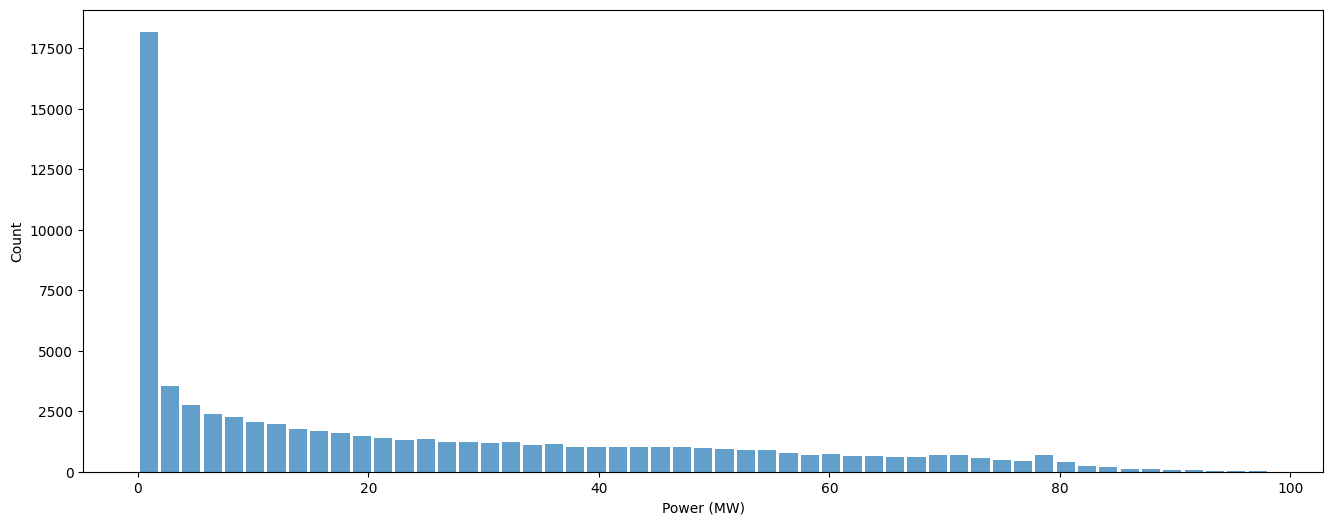

In [82]:
# plot histogram
plt.figure(figsize=(16,6))
plt.xlabel("Power (MW)")
plt.ylabel("Count")

plt.hist(
    x=df1['Power'], bins='auto',
    alpha=0.7, rwidth=0.85
)

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

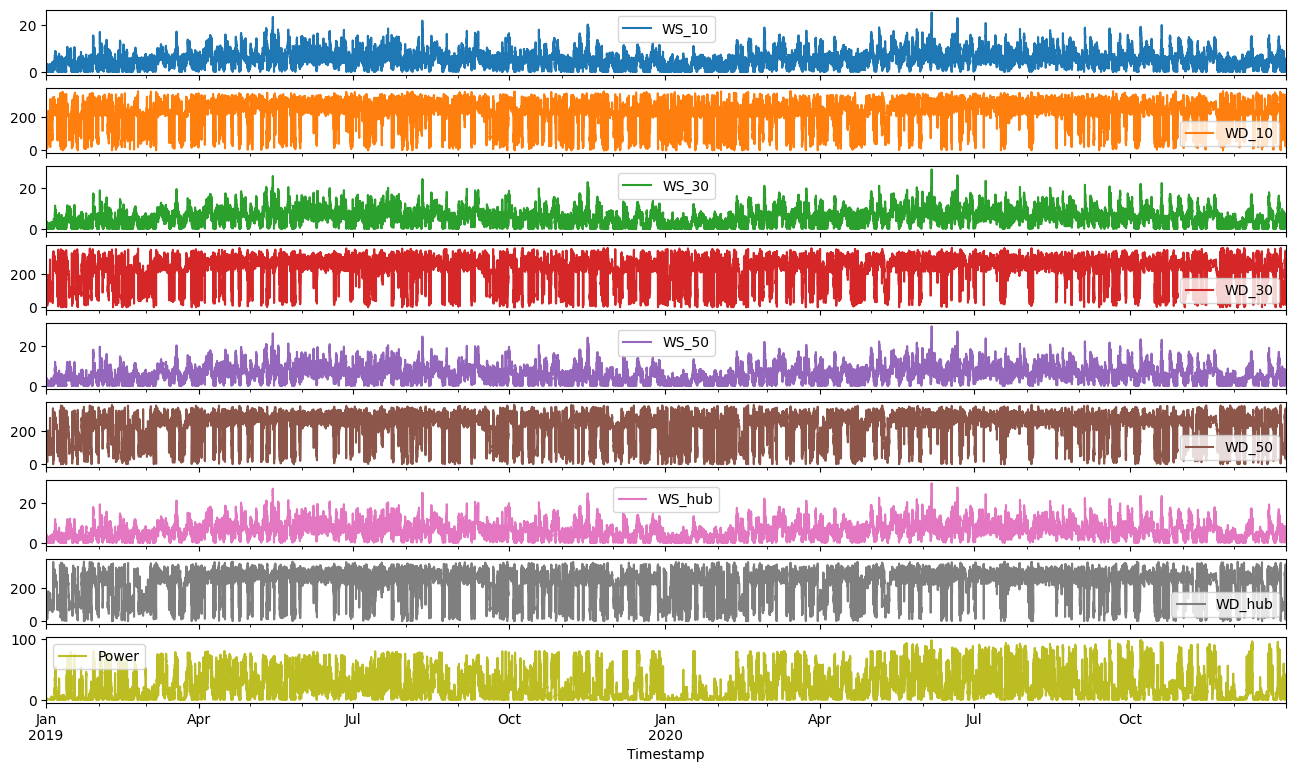

In [83]:
# Line plot
df1[['WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_hub','WD_hub','Power']].plot(subplots=True, figsize=(16, 9))

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

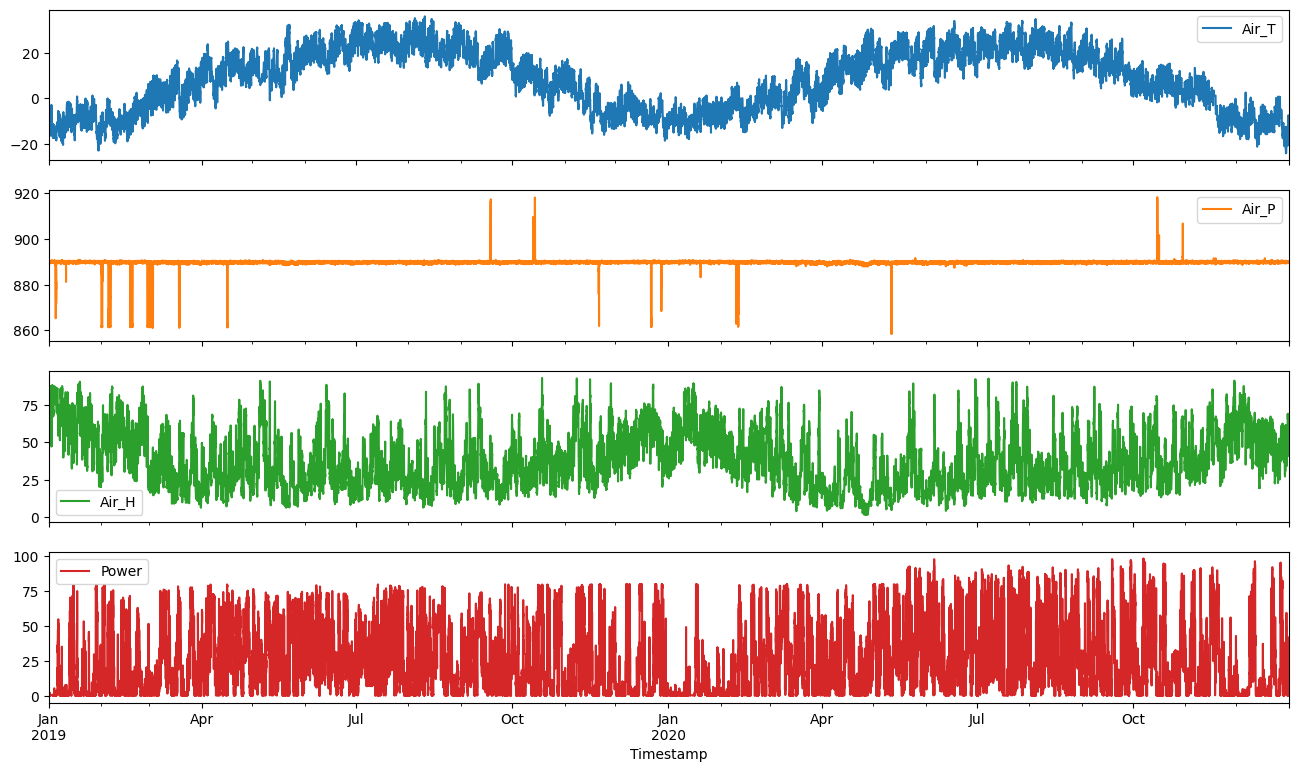

In [84]:
df1[['Air_T','Air_P','Air_H','Power']].plot(subplots=True, figsize=(16, 9))

<Axes: >

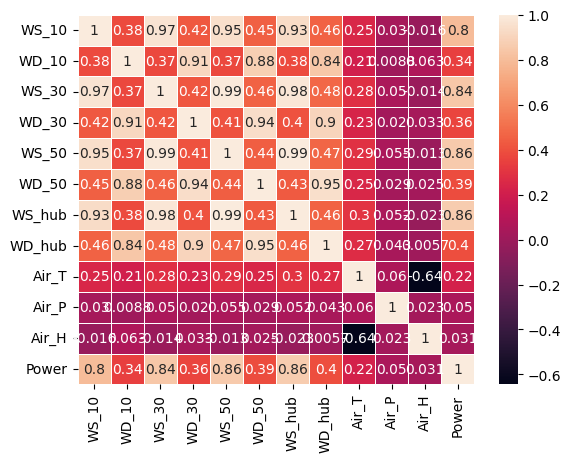

In [85]:
heatmap_df = df1
sns.heatmap(heatmap_df.corr(), annot=True, linewidth=.5)

In [86]:
FEATURES_TO_USE = ['WS_10', 'WS_30', 'WS_50', 'WS_hub']

In [87]:
df_final = df1[FEATURES_TO_USE]
df_output = df1[['Power']]

In [88]:
df_final.head()

,WS_10,WS_30,WS_50,WS_hub
Timestamp,,,,
2019-01-01 00:00:00,2.209,1.991,2.094,2.494
2019-01-01 00:15:00,1.828,1.698,1.757,1.882
2019-01-01 00:30:00,2.193,2.313,2.344,2.350
2019-01-01 00:45:00,2.654,2.494,2.574,2.808
2019-01-01 01:00:00,2.249,2.192,2.558,2.924


In [89]:
df_final.dtypes

WS_10     float64
WS_30     float64
WS_50     float64
WS_hub    float64
dtype: object

In [90]:
# Seasonality
decomposition = seasonal_decompose(df_output, model='additive', period=365)

In [92]:
# Trend & Seasonality

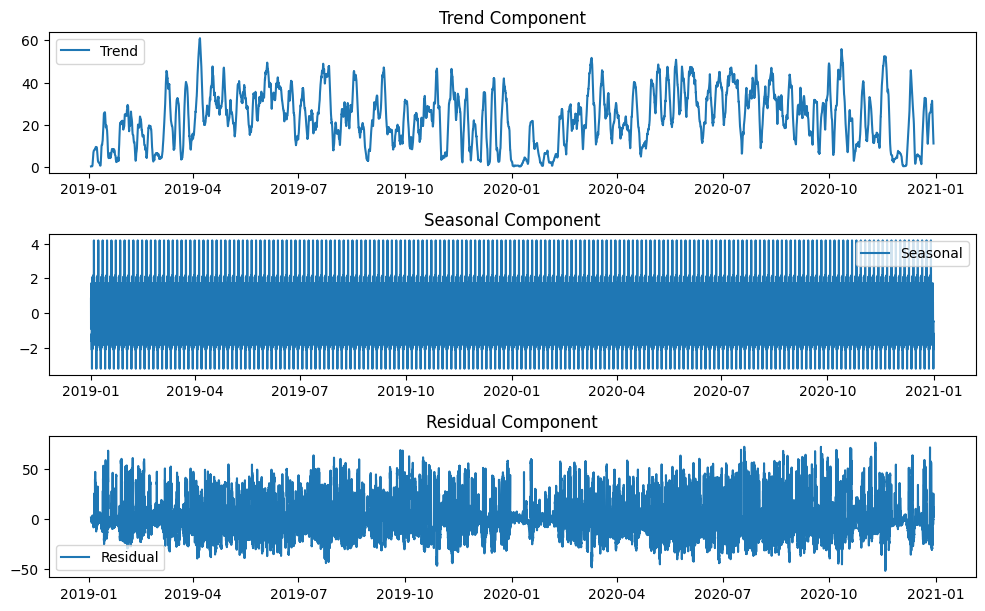

In [93]:
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

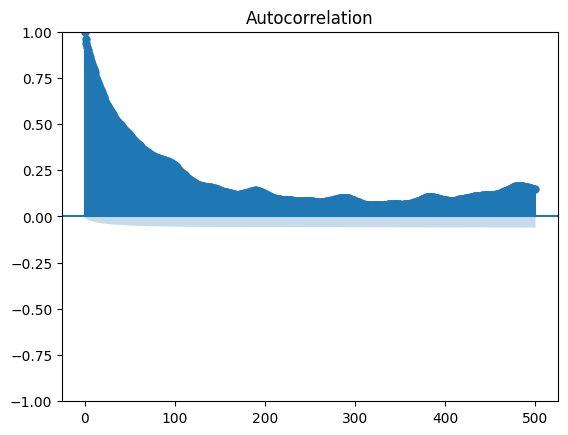

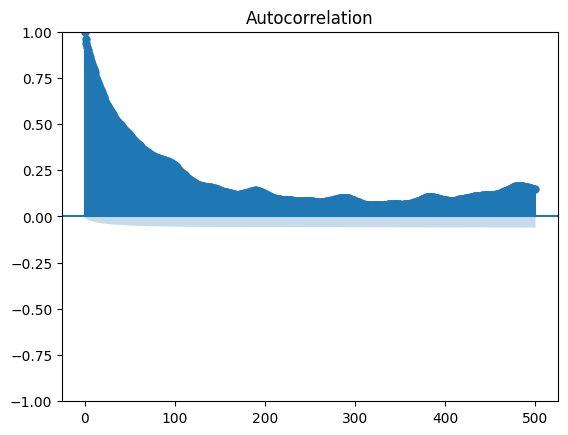

In [94]:
plot_acf(df1['WS_hub'], lags=500)

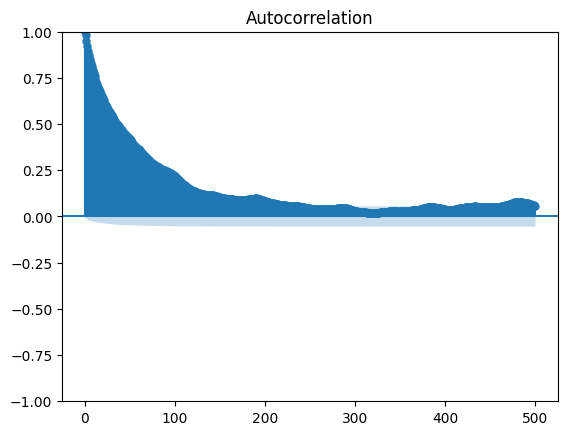

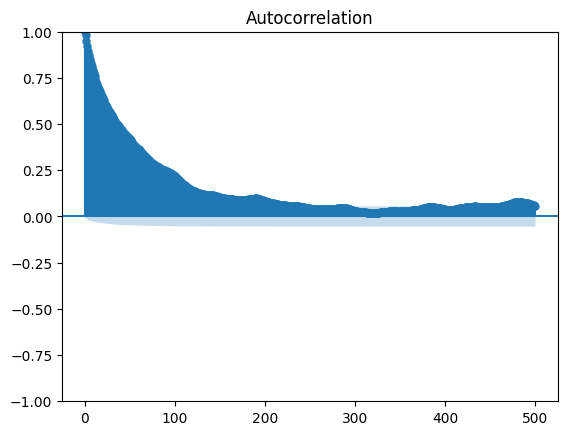

In [95]:
plot_acf(df_output, lags=500)

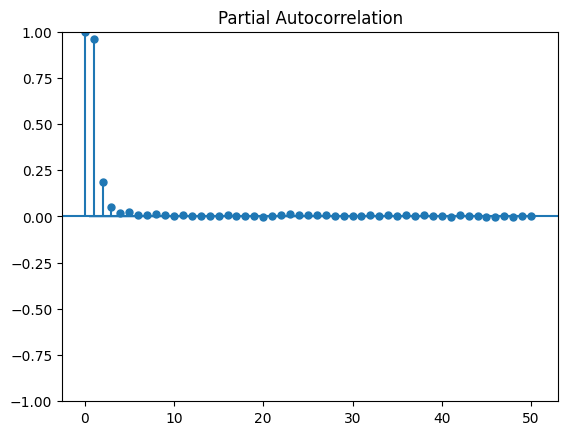

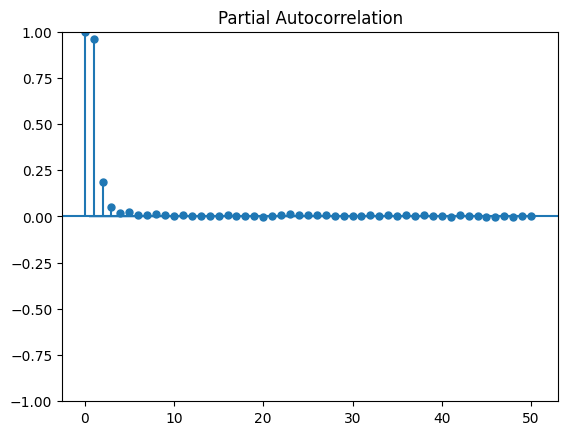

In [96]:
plot_pacf(df1['WS_hub'], lags=50)

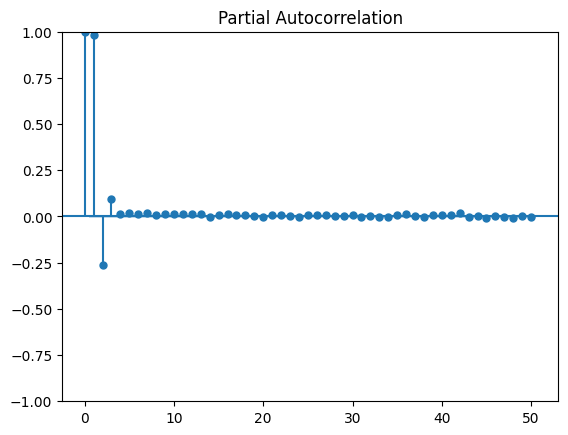

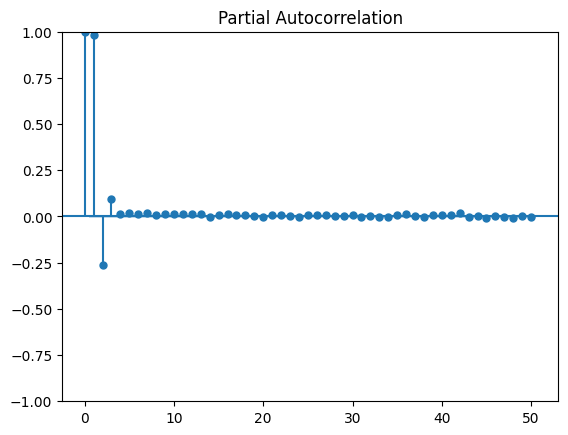

In [97]:
plot_pacf(df_output, lags=50)

In [98]:
# Model Preprocessing

In [104]:
X_train.shape

(56140, 4)